module://ipympl.backend_nbagg


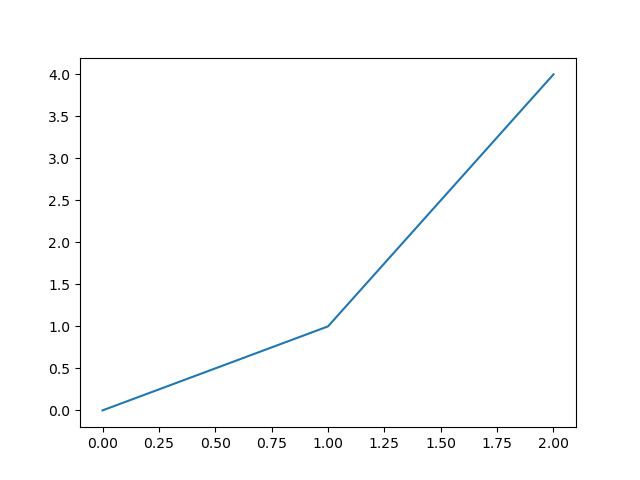

In [7]:
%matplotlib widget

import matplotlib
print(matplotlib.get_backend())

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1, 2], [0, 1, 4])
plt.show()


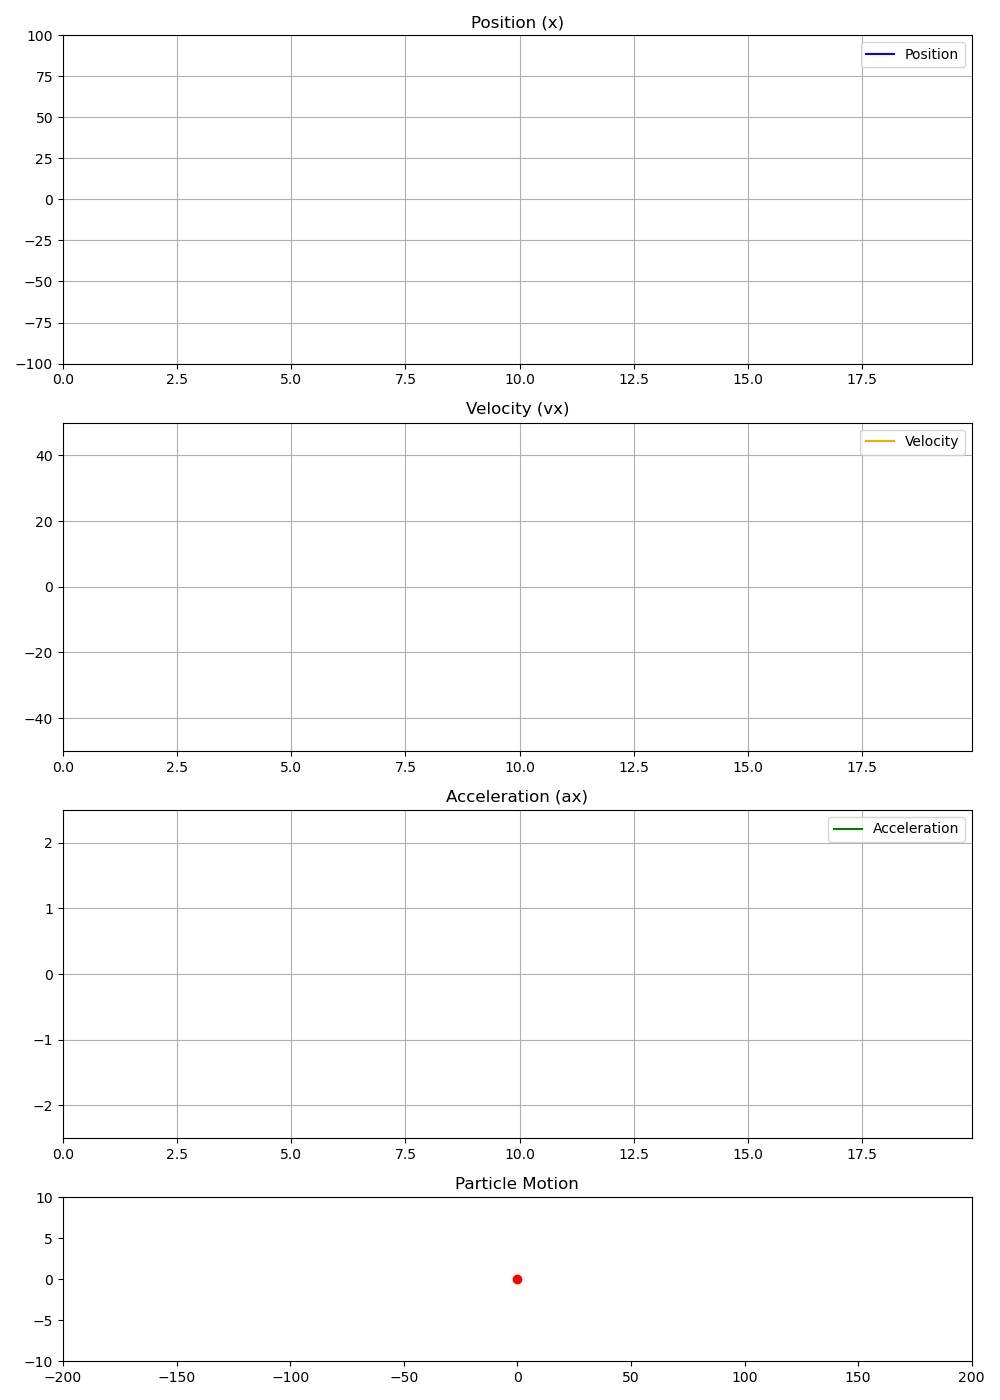

In [4]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import FloatSlider, VBox
from IPython.display import display

# Simulation parameters
dt = 0.1  # Time step
time = np.arange(0, 20, dt)  # Time array
a = [0.5]  # Initial acceleration as a mutable object
v = 0.0  # Initial velocity
x = 0.0  # Initial position

# Preallocated arrays for efficiency
positions = np.zeros(len(time))
velocities = np.zeros(len(time))
accelerations = np.zeros(len(time))

# Dynamically calculate the retention window size based on the x-axis range
plot_extent = time[-1]  # x-axis range of the plot
retention_duration = plot_extent  # Retain data for the entire x-axis range
window_size = int(retention_duration / dt)  # Calculate window size based on dt

# Create figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 14), gridspec_kw={'height_ratios': [1, 1, 1, 0.5]})
ax_pos, ax_vel, ax_acc, ax_motion = axes

# Configure subplots
ax_pos.set_title('Position (x)')
ax_pos.set_xlim(0, plot_extent)
ax_pos.set_ylim(-100, 100)
ax_vel.set_title('Velocity (vx)')
ax_vel.set_xlim(0, plot_extent)
ax_vel.set_ylim(-50, 50)
ax_acc.set_title('Acceleration (ax)')
ax_acc.set_xlim(0, plot_extent)
ax_acc.set_ylim(-2.5, 2.5)
ax_motion.set_title('Particle Motion')
ax_motion.set_xlim(-200, 200)
ax_motion.set_ylim(-10, 10)

# Lines for plots
position_line, = ax_pos.plot([], [], label='Position', color='blue')
velocity_line, = ax_vel.plot([], [], label='Velocity', color='orange')
acceleration_line, = ax_acc.plot([], [], label='Acceleration', color='green')

# Particle representation
scatter = ax_motion.scatter([x], [0], color='red', label='Particle')

# Enable legends and grid
for ax in [ax_pos, ax_vel, ax_acc]:
    ax.legend()
    ax.grid()

# Function to update the slider value
def update_acceleration(change):
    a[0] = change['new']  # Update the mutable object `a`

# Slider for controlling acceleration
acc_slider = FloatSlider(value=a[0], min=-2, max=2, step=0.1, description='Acceleration')
acc_slider.observe(update_acceleration, names='value')  # Attach callback to slider

# Update function for animation
def update(frame):
    global x, v
    # Update velocity and position using current acceleration
    v += a[0] * dt
    x += v * dt

    # Store updated values
    positions[frame] = x
    velocities[frame] = v
    accelerations[frame] = a[0]

    # Determine the start index based on window size
    start = max(0, frame - window_size)

    # Update lines for position, velocity, and acceleration
    position_line.set_data(time[start:frame + 1], positions[start:frame + 1])
    velocity_line.set_data(time[start:frame + 1], velocities[start:frame + 1])
    acceleration_line.set_data(time[start:frame + 1], accelerations[start:frame + 1])
    
    # Update particle position
    scatter.set_offsets([x, 0])

    # Dynamically adjust motion axis limits
    if frame % 10 == 0:  # Update axis limits less frequently
        ax_motion.set_xlim(min(positions[start:frame + 1]) - 20, max(positions[start:frame + 1]) + 20)
        ax_pos.set_ylim(min(positions[start:frame + 1]) - 20, max(positions[start:frame + 1]) + 20)
        ax_vel.set_ylim(min(velocities[start:frame + 1]) - 5, max(velocities[start:frame + 1]) + 5)

    return position_line, velocity_line, acceleration_line, scatter

# Create the animation with blit enabled
ani = FuncAnimation(fig, update, frames=len(time), interval=50, blit=False)

# Display slider and plots
display(VBox([acc_slider]))
plt.tight_layout()
plt.show()
